In [78]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
%matplotlib inline

fatal: destination path 'belt' already exists and is not an empty directory.


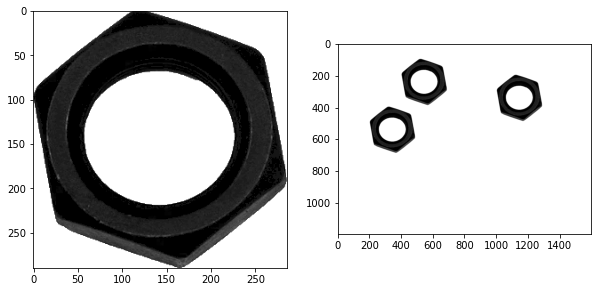

In [79]:
!git clone  https://github.com/RansikaG/EN2550---Machine-Vision belt
template_im = cv.imread(r'/content/belt/Assignment 5/template.png', cv.IMREAD_GRAYSCALE)
belt_im = cv.imread(r'/content/belt/Assignment 5/belt.png', cv.IMREAD_GRAYSCALE)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(template_im, cmap='gray')
ax[1].imshow(belt_im, cmap='gray')
plt.show()

##Part I

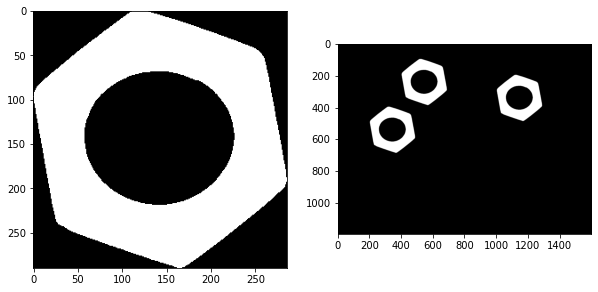

In [80]:
th_t, img_t = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(img_t, cmap='gray')
ax[1].imshow(img_b, cmap='gray')
plt.show()

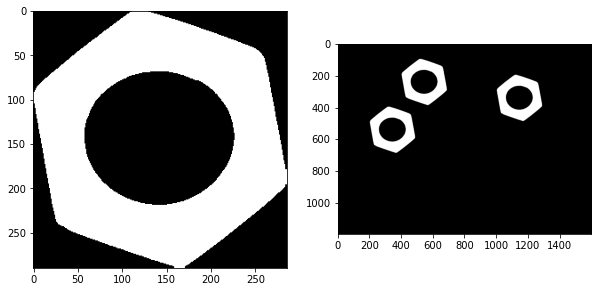

In [81]:
kernel = np.ones((3,3),dtype="uint8")
closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,2,figsize=(10,10))
ax[0].imshow(closing_t, cmap='gray')
ax[1].imshow(closing_b, cmap='gray')
plt.show()

In [82]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)

print("retval_t:",retval_t,"   retval_b:",retval_b)
print( centroids_b)

retval_t: 2    retval_b: 4
[[ 807.85728475  614.56805258]
 [ 542.82567158  243.78479797]
 [1142.82567158  343.78479797]
 [ 342.82567158  543.78479797]]


# No of connected Components
1.  template image : 1
2.  belt image     : 3

#Statistics
There are 5 stats for each connected component, they are
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-2bev{border-color:#656565;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-2bev" rowspan="2">Stat</th>
    <th class="tg-c3ow">Template <br>Image</th>
    <th class="tg-c3ow" colspan="3">Belt <br>Image</th>
  </tr>
  <tr>
    <td class="tg-0pky">Contour 1</td>
    <td class="tg-0pky">Contour 1</td>
    <td class="tg-0pky">Contour 2</td>
    <td class="tg-2bev">Contour 3</td>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-2bev">1)The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.</td>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">400</td>
    <td class="tg-0pky">1000</td>
    <td class="tg-2bev">200</td>
  </tr>
  <tr>
    <td class="tg-2bev">2)The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.</td>
    <td class="tg-0pky">0</td>
    <td class="tg-0pky">100</td>
    <td class="tg-0pky">200</td>
    <td class="tg-2bev">400</td>
  </tr>
  <tr>
    <td class="tg-2bev">3)The horizontal size of the bounding box.</td>
    <td class="tg-0pky">286</td>
    <td class="tg-0pky">286</td>
    <td class="tg-0pky">286</td>
    <td class="tg-2bev">286</td>
  </tr>
  <tr>
    <td class="tg-2bev">4)The vertical size of the bounding box.</td>
    <td class="tg-0pky">290</td>
    <td class="tg-0pky">290</td>
    <td class="tg-0pky">290</td>
    <td class="tg-2bev">290</td>
  </tr>
  <tr>
    <td class="tg-2bev">5)The total area (in pixels) of the connected component.</td>
    <td class="tg-0pky">40650</td>
    <td class="tg-0pky">40613</td>
    <td class="tg-0pky">40613</td>
    <td class="tg-0pky">40613</td>
  </tr>
</tbody>
</table>

#Centroids
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-gkae{border-color:#656565;font-size:24px;text-align:center;vertical-align:top}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-2bev{border-color:#656565;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-gkae" rowspan="2"></th>
    <th class="tg-c3ow"><span style="font-weight:bold">Template </span><br><span style="font-weight:bold">Image</span></th>
    <th class="tg-c3ow" colspan="3"><span style="font-weight:bold">Belt </span><br><span style="font-weight:bold">Image</span></th>
  </tr>
  <tr>
    <td class="tg-0pky">Contour 1</td>
    <td class="tg-0pky">Contour 1</td>
    <td class="tg-0pky">Contour 2</td>
    <td class="tg-2bev">Contour 3</td>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-2bev">x coordinate</td>
    <td class="tg-0pky">142.82489545</td>
    <td class="tg-0pky">542.82567158</td>
    <td class="tg-0pky">1142.82567158</td>
    <td class="tg-2bev">342.82567158</td>
  </tr>
  <tr>
    <td class="tg-2bev">y coordinate</td>
    <td class="tg-0pky">143.780369</td>
    <td class="tg-0pky">243.78479797</td>
    <td class="tg-0pky">343.78479797</td>
    <td class="tg-2bev">543.78479797</td>
  </tr>
</tbody>
</table>




In [135]:
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours_b))

6


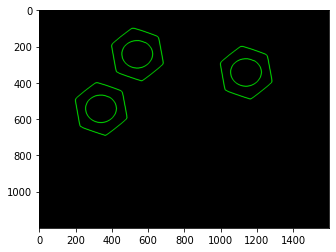

In [136]:
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

In [85]:
label = 1 # remember that the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8')
belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
for j,c in enumerate(belt_cont):
  print(cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0))

0.00010071698397151607
0.00010071698397928763
0.00010071698397484674


##Part II

In [86]:
cnt = contours_b[1]
ca = cv.contourArea(cnt)
print("ca :",ca)

ca : 20080.0


In [87]:
M = cv.moments(cnt)
cx, cy = int(M['m10']/M['m00']),int(M['m01']/M['m00'])
print("cx:",cx,"cy:",cy)

cx: 341 cy: 542


In [88]:
"""count=1
object_prev_frame = [cx,cy,ca,count]
object_curr_frame=[cx_cu,cy_cu,ca_cu,count_cu]
delta_x=object_curr_frame[0]-object_prev_frame[0]"""

'count=1\nobject_prev_frame = [cx,cy,ca,count]\nobject_curr_frame=[cx_cu,cy_cu,ca_cu,count_cu]\ndelta_x=object_curr_frame[0]-object_prev_frame[0]'

##Part III

In [89]:
def get_indexed_image(im):
  """ Thresholding, closing, and connected component analysis lumped
  """
  th_im, img_im = cv.threshold(im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
  kernel = np.ones((3,3),dtype="uint8")
  closing_im = cv.morphologyEx(img_im, cv.MORPH_CLOSE, kernel)
  retval, labels, stats, centroids= cv.connectedComponentsWithStats(closing_im)
  return retval, labels, stats, centroids,closing_im

In [97]:
def is_new(a, b, delta, i):
  """ Vector Dissimilarity with an Array of Vectors
  Checks if vector b is similar to a one or more vectors in a outside the␣
  ,!tolerances specified in delta.
  vector i specifies which elements in b to compare with those in a.
  """
  a=np.array(a)
  b=np.array(b)
  b_=b[i]
  for vector in a:
    vector_=vector[i]
    diff=abs(vector_-b_)
    if np.less_equal(diff, delta).all():
      return False
  return True

In [107]:
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta_x=15
delta = np.array([delta_x,delta_x])
i = np.array([0,1])
assert is_new(a, b, delta, i) == False, " Check the function "

In [116]:
def prev_index(a, b, delta, i):
  """ Returns Previous Index
  Returns the index of the apppearance of the object in the previous frame.
  (See thee example in the next cell)
  """

  index = -1
  a=np.array(a)
  b=np.array(b)
  b_=b[i]
  for index in range(len(a)):
    vector=a[index]
    vector_=vector[i]
    diff=abs(vector_-b_)
    if np.less_equal(diff, delta).all():
      return index
  return index

In [120]:
# check prev_index expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])
assert prev_index(a,b,delta,i) == 1, " Check the function "

In [ ]:
cap = cv.VideoCapture('/content/belt/Assignment 5/conveyor_two_frame.mp4') # give the correct path here
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
  cv2_imshow(frame)
  if cv.waitKey(1) == ord('q'):
    break
cap.release()
cv.destroyAllWindows()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


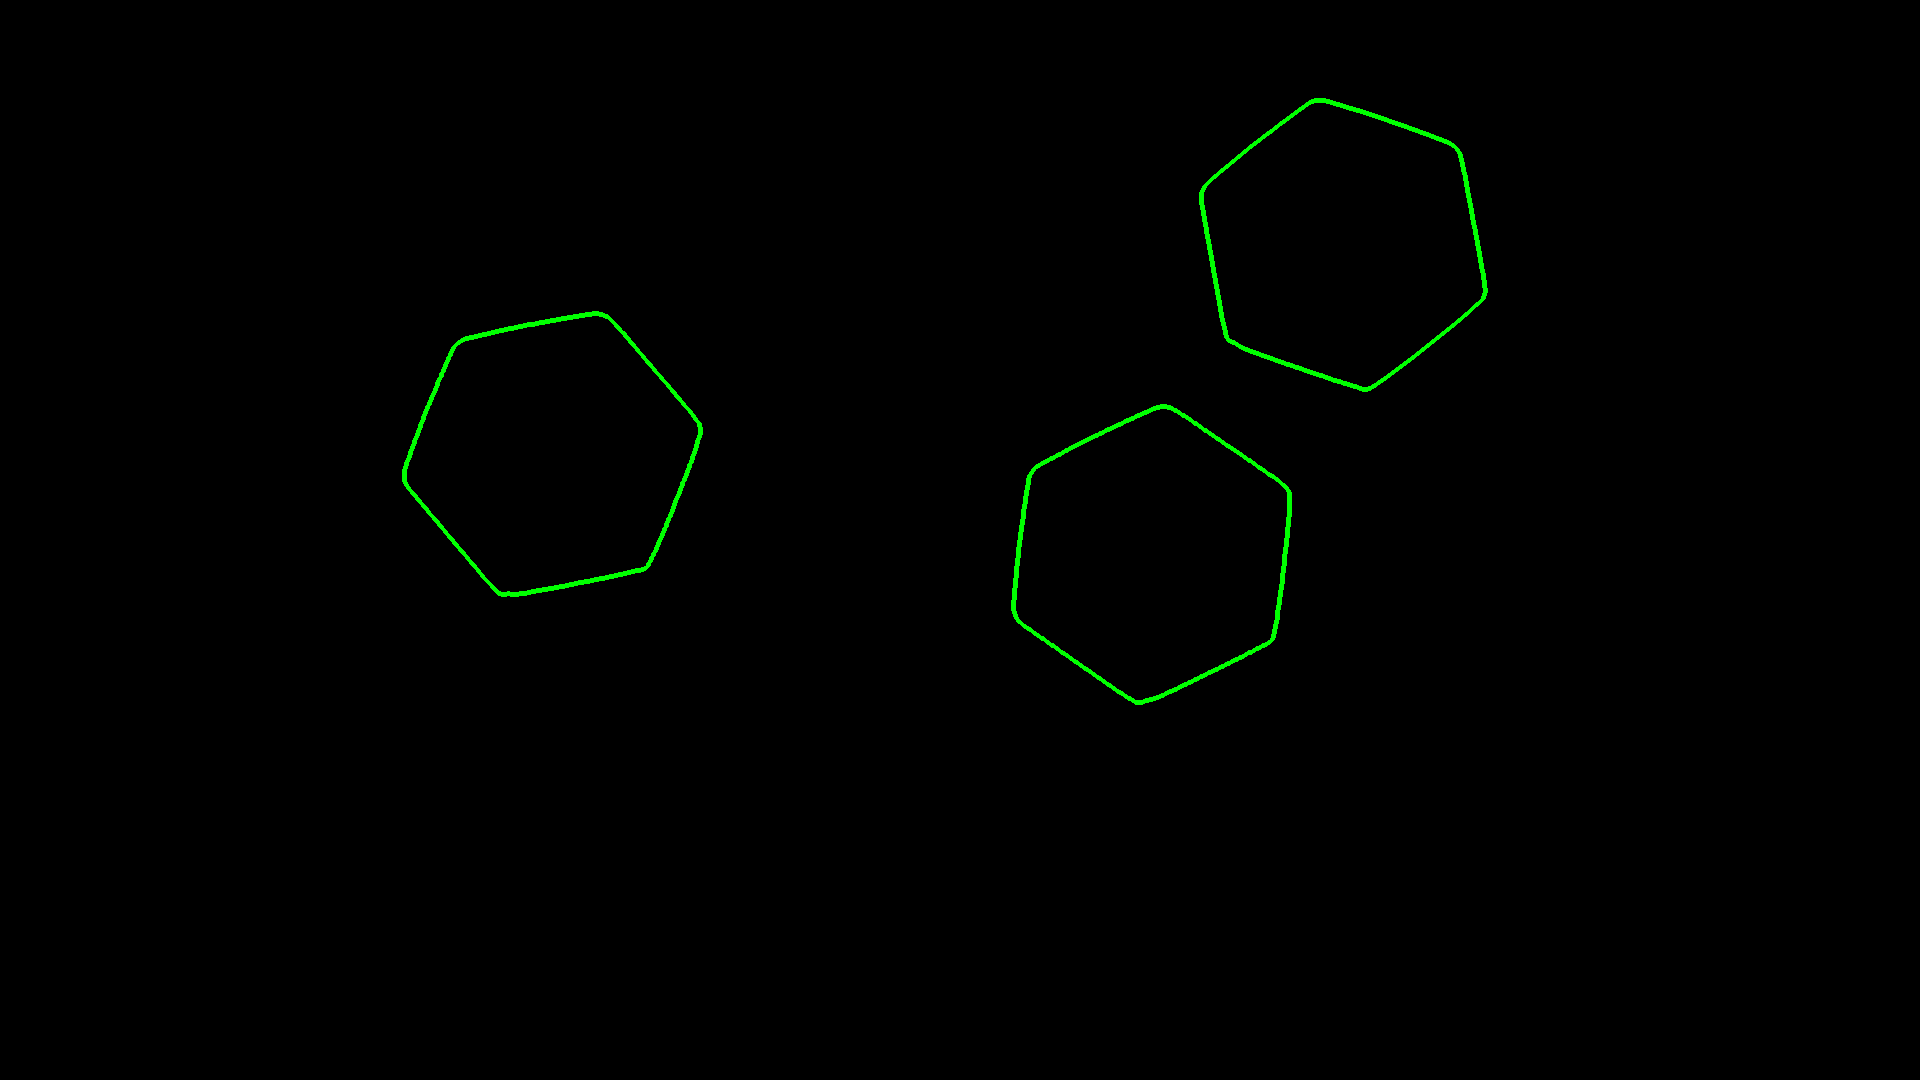

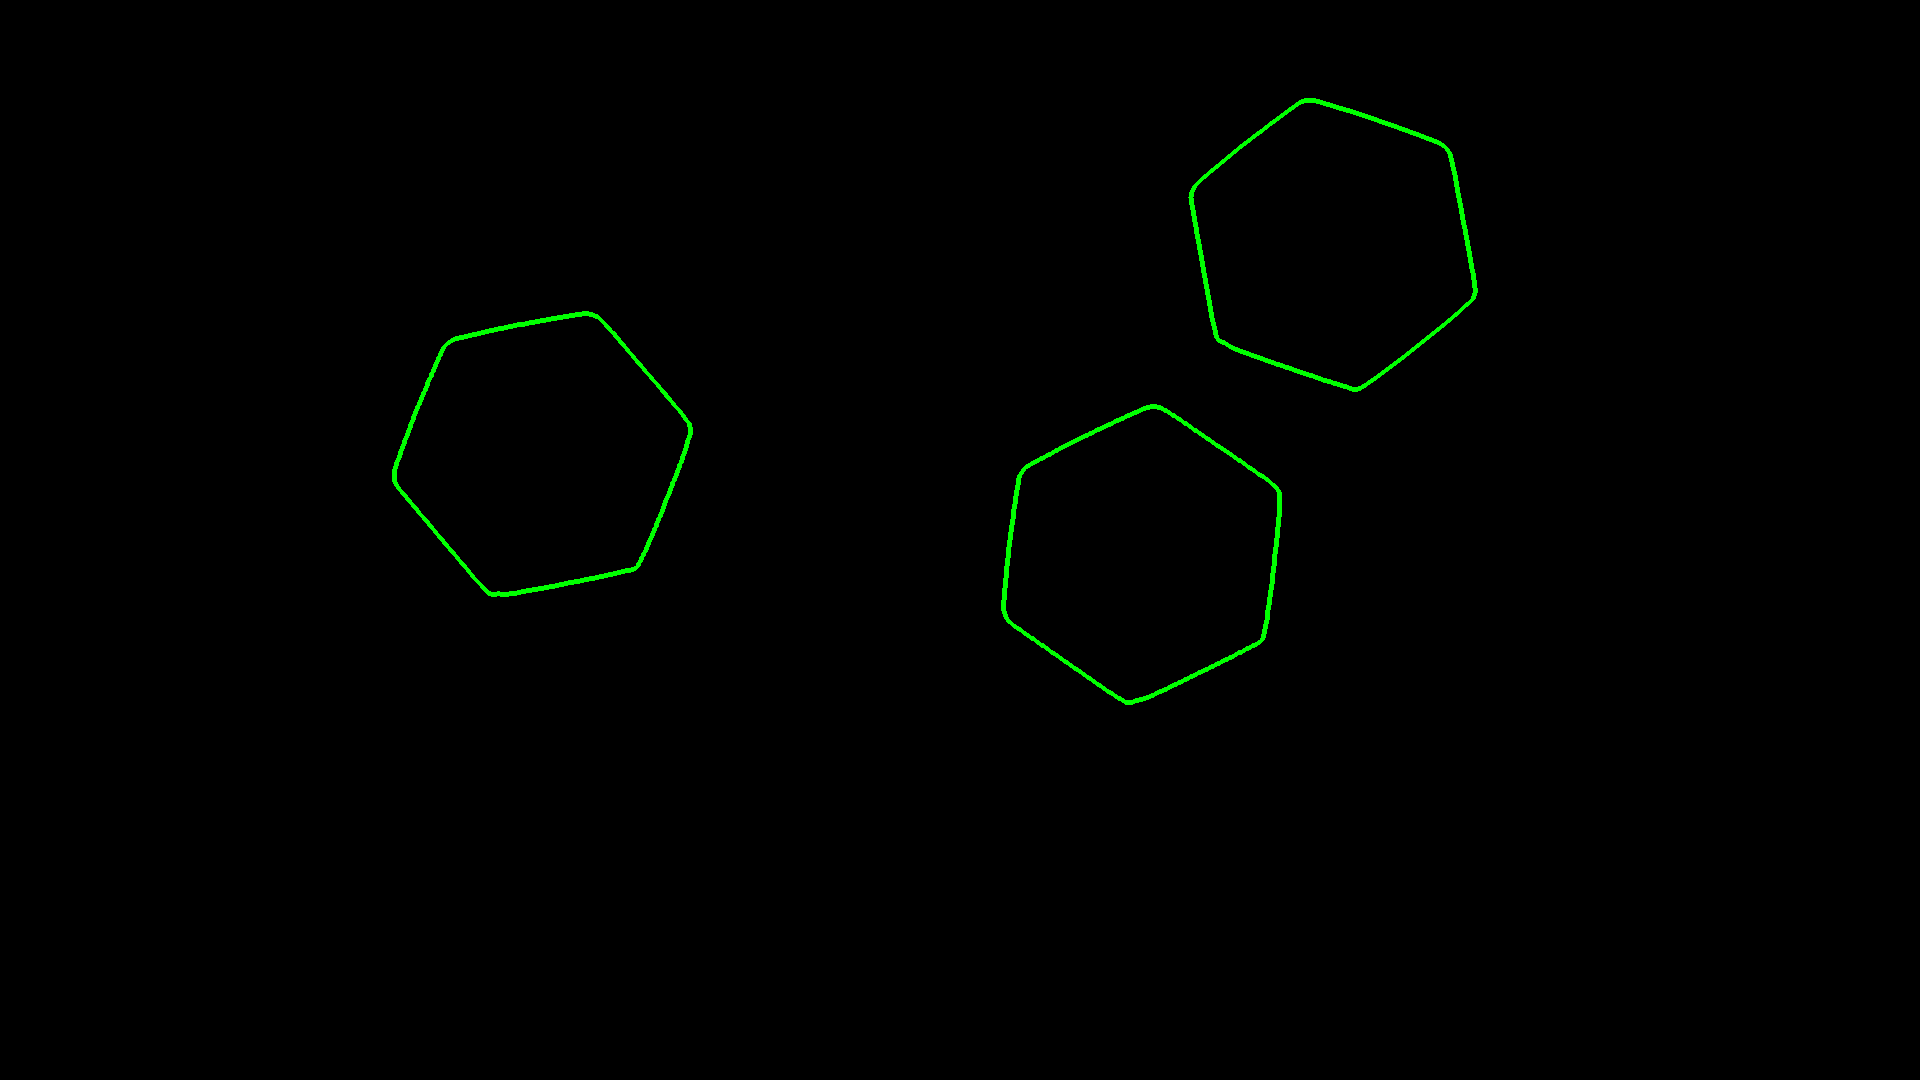

Can't receive frame (stream end?). Exiting ...


In [141]:
cap = cv.VideoCapture('/content/belt/Assignment 5/conveyor_two_frame.mp4') # give the correct path here
frame_no=1
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
  gray=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

  retval, labels, stats, centroids,closing_im=get_indexed_image(gray)

  contours, hierarchy = cv.findContours(closing_im, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  hexagonal=[]
  for j,c in enumerate(contours):
    if cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)<0.001:
      hexagonal.append(j)
  im_contours_belt = np.zeros((frame.shape[0],frame.shape[1],3), np.uint8)
  Contours = np.array(contours)
  Contours=Contours[hexagonal]
  cont=Contours#Full hexagonal contours are seperated
  
  conts = cv.drawContours(im_contours_belt, cont, -1, (0,255,0), 3).astype('uint8')#contour image

  
  cv2_imshow(conts)
  if cv.waitKey(1) == ord('q'):
    break
cap.release()
cv.destroyAllWindows()

In [130]:
def insert_text(current_frame,frame,frame_no):
  no_objects=len(current_frame)
  bottom_position = (10, frame.shape[0])
  text = "Some text including newline \n characters."
  font_scale = 1
  color = (255, 0, 255)
  thickness = 2
  font = cv.FONT_HERSHEY_SIMPLEX
  line_type = cv.LINE_AA

  text_size, _ = cv.getTextSize(text, font, font_scale, thickness)
  line_height = text_size[1]*2
  x, y0 =bottom_position
  y0-=(no_objects+1)* line_height
  cv.putText(frame,"Frame"+str(frame_no),(x, y0),font,font_scale,(0,255,0),thickness,line_type)
  for i in range(no_objects):#position shit
      Object=current_frame[i]
      y = y0 + (i+1)* line_height
      details="Object "+str(Object[3])+": "+str(Object[0])+", "+str(Object[1])+", "+str(Object[2])
      cv.putText(frame,details,(x, y),font,font_scale,color,thickness,line_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


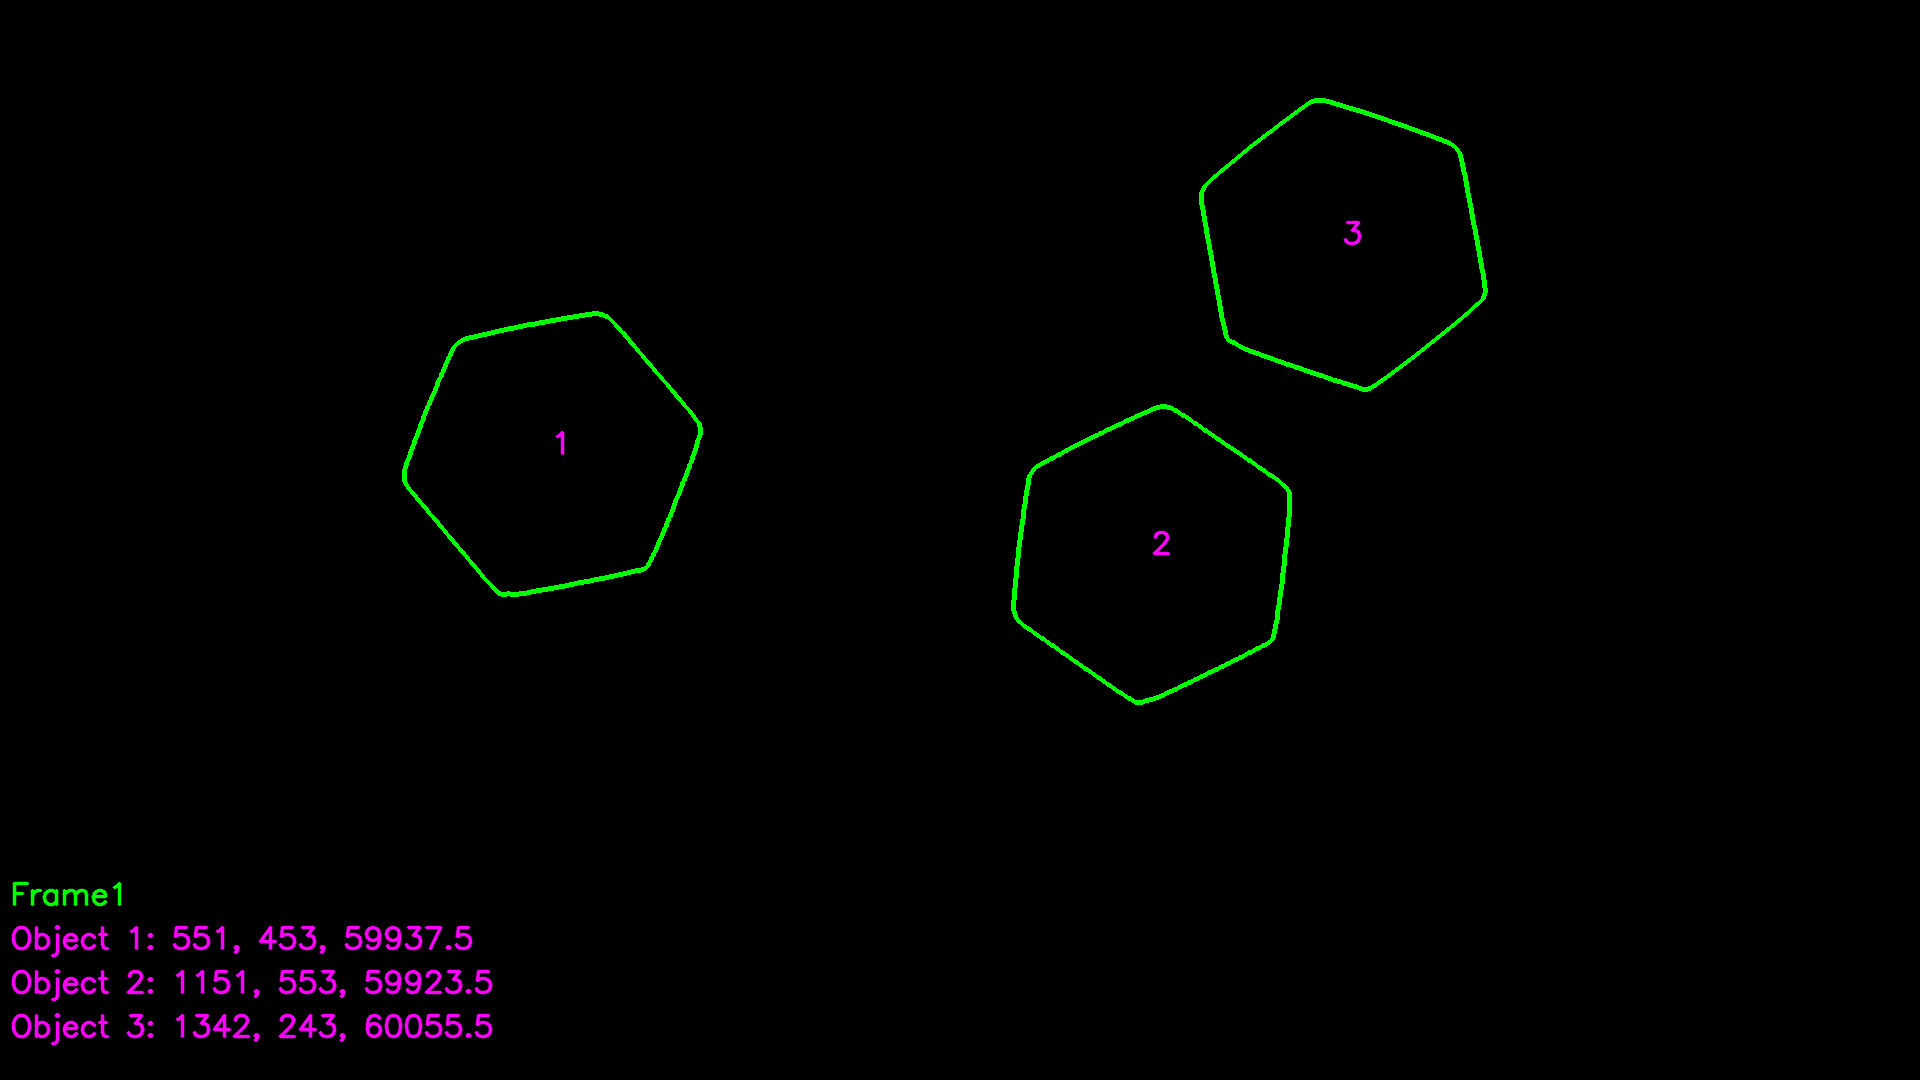

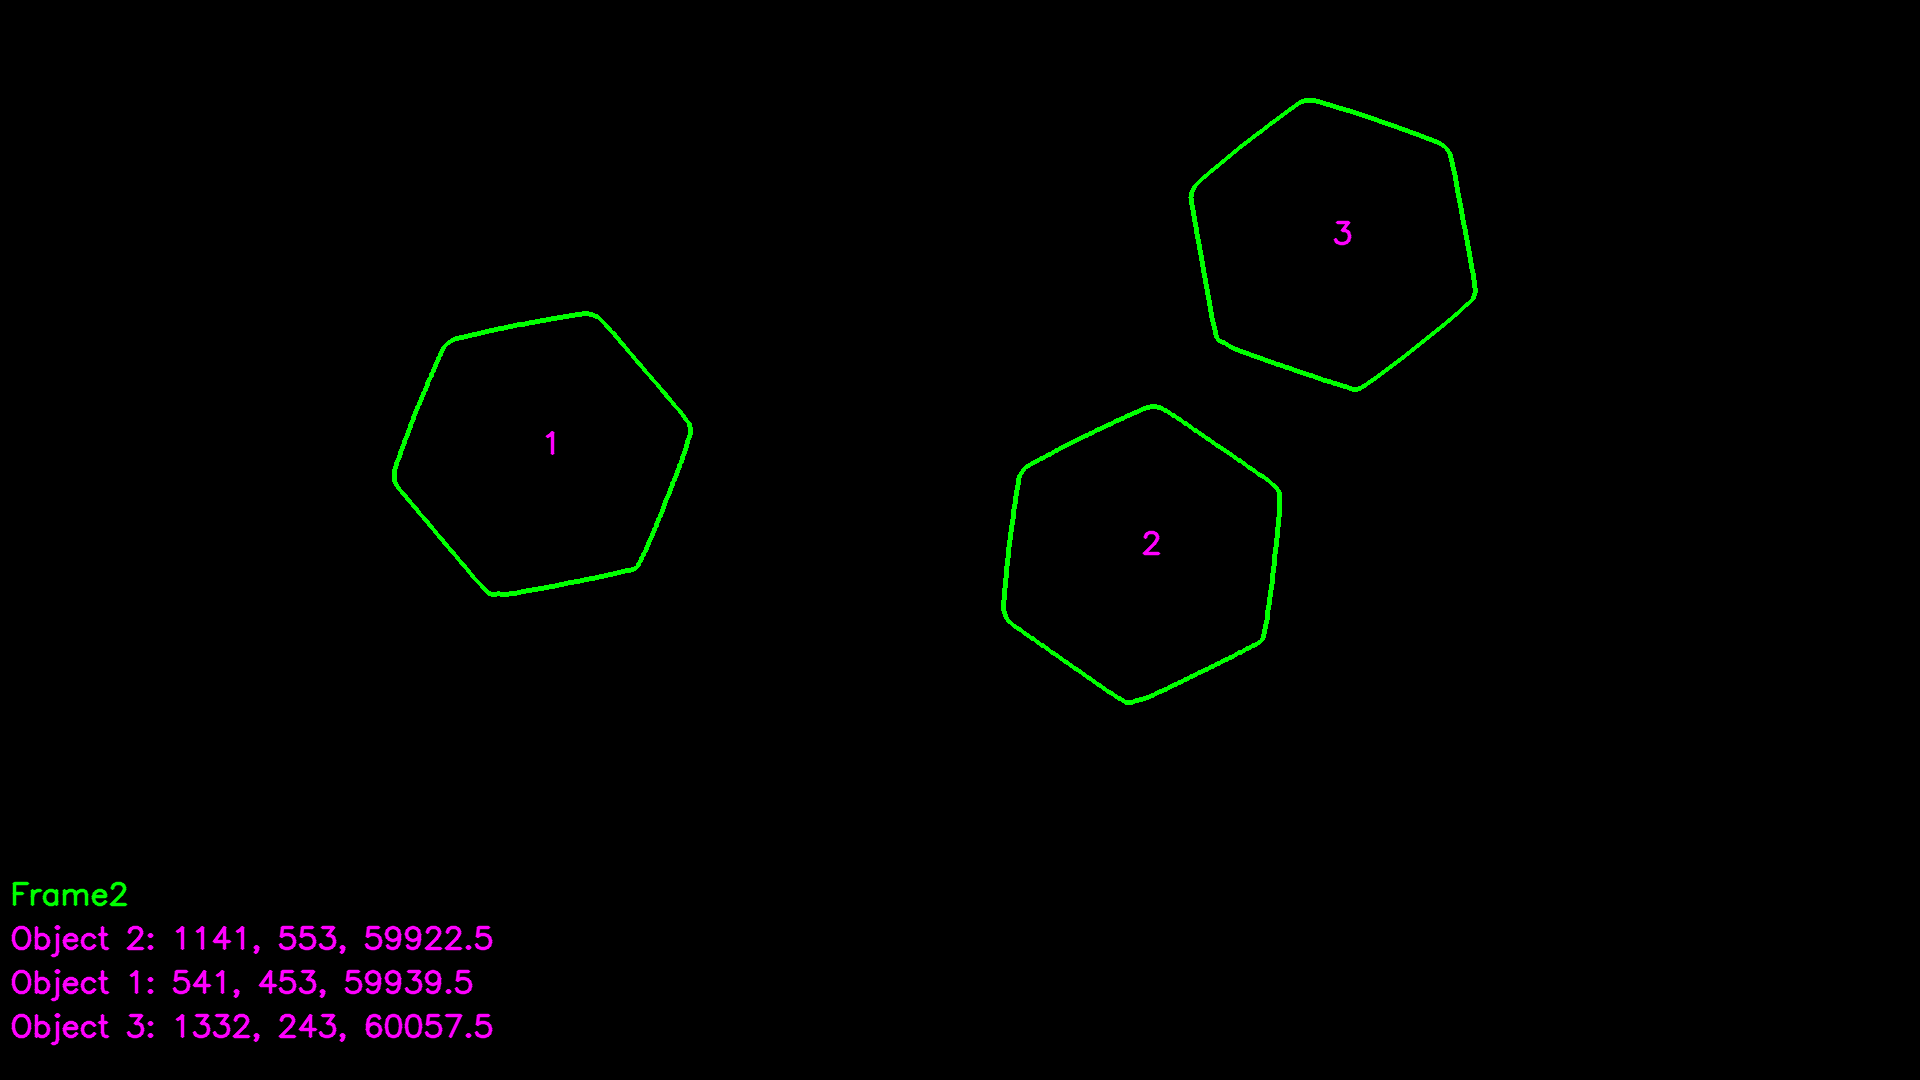

Can't receive frame (stream end?). Exiting ...


In [140]:
cap = cv.VideoCapture('/content/belt/Assignment 5/conveyor_two_frame.mp4') # give the correct path here
frame_no=1
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
  gray=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

  retval, labels, stats, centroids,closing_im=get_indexed_image(gray)

  contours, hierarchy = cv.findContours(closing_im, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
  hexagonal=[]
  for j,c in enumerate(contours):
    if cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0)<0.001:
      hexagonal.append(j)
  im_contours_belt = np.zeros((frame.shape[0],frame.shape[1],3), np.uint8)
  Contours = np.array(contours)
  Contours=Contours[hexagonal]
  cont=Contours#Full hexagonal contours are seperated
  
  conts = cv.drawContours(im_contours_belt, cont, -1, (0,255,0), 3).astype('uint8')#contour image

  current_frame=[]
  if frame_no==1:
    sorted_ctrs = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])
    for i in range(len(cont)):
      M = cv.moments(sorted_ctrs[i])
      cx, cy = int(M['m10']/M['m00']),int(M['m01']/M['m00'])
      ca = cv.contourArea(sorted_ctrs[i])
      obj_current_frame=[cx,cy,ca,i+1]
      current_frame.append(obj_current_frame)
      cv.putText(conts,str(obj_current_frame[3]),(obj_current_frame[0],obj_current_frame[1]), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,255),2,cv.LINE_AA)
  
  else:
    i=[0,1,2]#needs to be rechecked
    delta=[15,15,500]
    prev_count=len(previous_frame)
    for contour in cont:
      M = cv.moments(contour)
      cx, cy = int(M['m10']/M['m00']),int(M['m01']/M['m00'])
      ca = cv.contourArea(contour)
      obj_current_frame=[cx,cy,ca,None]#count is not defined
      if is_new(previous_frame, obj_current_frame, delta, i):
        prev_count+=1
        obj_current_frame=[cx,cy,ca,prev_count]
      else:
        prev_i=prev_index(previous_frame, obj_current_frame, delta, i)
        obj_current_frame=[cx,cy,ca,previous_frame[prev_i][3]]
      current_frame.append(obj_current_frame)
      cv.putText(conts,str(obj_current_frame[3]),(obj_current_frame[0],obj_current_frame[1]), cv.FONT_HERSHEY_SIMPLEX, 1,(255,0,255),2,cv.LINE_AA)

  insert_text(current_frame,conts,frame_no)
  frame_no+=1
  
  previous_frame=current_frame
  
  cv2_imshow(conts)
  if cv.waitKey(1) == ord('q'):
    break
cap.release()
cv.destroyAllWindows()